In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [196]:
df = pd.read_csv("opp-stops_state.csv")

In [197]:
# drop all NaN values
df.drop(columns = ['city', 'geography'], inplace = True)
df.dropna(inplace = True)

# add number of searches column
df['nb_searches'] = df.search_rate * df.stops_per_year


In [260]:
#Définir array des états bleus et rouges
red_states = ['SC', 'TX']
blue_states  = ['IL', 'CT', 'RI']

#Fonction pour trier les états en blue et red: 
def what_color (name): #retourne toujours none !
    if any(s == name for s in blue_states):
        return 'blue'
    elif any(s == name for s in red_states):
        return 'red'
    else:
        return 'none'
    
def sort_array_of_state(dataframe):
    colors = []
    for state in dataframe['state']:
        colors.append(what_color(state))
    return colors
    
#Trier les états de notre dataframe:
df['party'] = sort_array_of_state(df)


In [261]:
blue = df[df['party'].str.contains('blue')]
red = df[df['party'].str.contains('red')]
blue

,state,subgeography,subject_race,search_rate,stop_rate,hit_rate,inferred_threshold,stops_per_year,stop_rate_n,nb_searches,party
418,CT,Fairfield County,white,0.013487,0.065458,0.356108,0.223550,17189.76,160113.12,231.84,blue
419,CT,Fairfield County,black,0.029384,0.073116,0.315113,0.171864,5080.32,25650.72,149.28,blue
420,CT,Fairfield County,hispanic,0.020520,0.039236,0.257426,0.198470,4725.12,21654.72,96.96,blue
421,CT,Hartford County,white,0.012005,0.065458,0.319820,0.238114,17752.80,160113.12,213.12,blue
422,CT,Hartford County,black,0.036567,0.073116,0.303398,0.155822,5408.16,25650.72,197.76,blue
...,...,...,...,...,...,...,...,...,...,...,...
2475,RI,500,black,0.072370,0.124369,0.457045,0.160940,2412.60,7196.00,174.60,blue
2476,RI,500,hispanic,0.067899,0.044056,0.421182,0.152781,2391.80,6780.60,162.40,blue
2488,RI,900,white,0.016673,0.041327,0.396657,0.244227,7893.20,31961.60,131.60,blue
2489,RI,900,black,0.032466,0.124369,0.375000,0.211771,1429.20,7196.00,46.40,blue


In [200]:
blue_weighted_hit_rate_mean = (blue.hit_rate*blue.nb_searches / blue.nb_searches.sum()).sum()
red_weighted_hit_rate_mean = np.sum(red.hit_rate*red.nb_searches / red.nb_searches.sum())
blue_weighted_hit_rate_mean, red_weighted_hit_rate_mean, blue.hit_rate.mean()

(0.29139738026178863, 0.31956456866738936, 0.3033774690616758)

In [201]:
a = df[df.state.str.contains('CT')].dropna().stops_per_year.sum() +df[df.state.str.contains('IL')].dropna().stops_per_year.sum() + df[df.state.str.contains('RI')].dropna().stops_per_year.sum()

In [202]:
b = df[df.state.str.contains('TX')].dropna().stops_per_year.sum() + df[df.state.str.contains('SC')].dropna().stops_per_year.sum()

In [203]:
a, b, a/b

(517674.6266666667, 2104964.397693118, 0.2459303479118217)

Wesh on a choisit Connecticut (55%), Illinois (55%), RI (54%), TX (52%), SC (55%)

In [204]:
# get dataframe for each blue state
df_ct = df[df.state.str.contains('CT')]
df_il = df[df.state.str.contains('IL')]
df_ri = df[df.state.str.contains('RI')]

In [205]:
# get dataframe for each red state
df_tx = df[df.state.str.contains('TX')]
df_sc = df[df.state.str.contains('SC')]
df_tx[df_tx.subgeography.str.contains('')]
df_total = pd

In [206]:
# make blue and red dataframe by concatenation
df_blue = pd.concat([df_ct, df_il, df_ri])
df_red = pd.concat([df_tx, df_sc])
df_blue.head()

,state,subgeography,subject_race,search_rate,stop_rate,hit_rate,inferred_threshold,stops_per_year,stop_rate_n,nb_searches,party
418,CT,Fairfield County,white,0.013487,0.065458,0.356108,0.223550,17189.76,160113.12,231.84,blue
419,CT,Fairfield County,black,0.029384,0.073116,0.315113,0.171864,5080.32,25650.72,149.28,blue
420,CT,Fairfield County,hispanic,0.020520,0.039236,0.257426,0.198470,4725.12,21654.72,96.96,blue
421,CT,Hartford County,white,0.012005,0.065458,0.319820,0.238114,17752.80,160113.12,213.12,blue
422,CT,Hartford County,black,0.036567,0.073116,0.303398,0.155822,5408.16,25650.72,197.76,blue


We ideally want all values by subject_race so we will manipulate the dataframe to obtain this

In [324]:
## pivot dataframes to organise them how we want
df_blue_pivot = df_blue.pivot(index= ['state', 'subgeography'], columns = ['subject_race'])
df_red_pivot = df_red.pivot(index= ['state', 'subgeography'], columns = ['subject_race'])
df_blue_pivot.swaplevel(1,0, axis = 1).head()

subject_race                  black    hispanic       white     black  \
                        search_rate search_rate search_rate stop_rate   
state subgeography                                                      
CT    Fairfield County     0.029384    0.020520    0.013487  0.073116   
      Hartford County      0.036567    0.036986    0.012005  0.073116   
      Litchfield County    0.034749    0.038982    0.016265  0.073116   
      New Haven County     0.028742    0.030105    0.011492  0.073116   
      New London County    0.031647    0.029246    0.014475  0.073116   

subject_race             hispanic     white     black  hispanic     white  \
                        stop_rate stop_rate  hit_rate  hit_rate  hit_rate   
state subgeography                                                          
CT    Fairfield County   0.039236  0.065458  0.315113  0.257426  0.356108   
      Hartford County    0.039236  0.065458  0.303398  0.294776  0.319820   
      Litchfield County  0.039236  0.065458  0.301587  0.438776  0.413978   
      New Haven County   0.039236  0.065458  0.247191  0.302548  0.357401   
      New London County  0.039236  0.065458  0.331683  0.325926  0.335580   

subject_race                         black  ...          white       black  \
                        inferred_threshold  ... stops_per_year stop_rate_n   
state subgeography                          ...                              
CT    Fairfield County            0.171864  ...       17189.76    25650.72   
      Hartford County             0.155822  ...       17752.80    25650.72   
      Litchfield County           0.184323  ...       16466.88    25650.72   
      New Haven County            0.166497  ...       23139.36    25650.72   
      New London County           0.172387  ...       24605.76    25650.72   

subject_race               hispanic       white       black    hispanic  \
                        stop_rate_n stop_rate_n nb_searches nb_searches   
state subgeography                                                        
CT    Fairfield County     21654.72   160113.12      149.28       96.96   
      Hartford County      21654.72   160113.12      197.76      134.00   
      Litchfield County    21654.72   160113.12       31.50       49.00   
      New Haven County     21654.72   160113.12      170.88      150.72   
      New London County    21654.72   160113.12       96.96       64.80   

subject_race                  white black hispanic white  
                        nb_searches party    party party  
state subgeography                                        
CT    Fairfield County       231.84  blue     blue  blue  
      Hartford County        213.12  blue     blue  blue  
      Litchfield County      267.84  blue     blue  blue  
      New Haven County       265.92  blue     blue  blue  
      New London County      356.16  blue     blue  blue  

[5 rows x 24 columns]

In [208]:
# get a dataframe of the (blue and red) state averages for each rate
df_means = pd.concat([df_red_pivot.groupby('state').mean(),df_blue_pivot.groupby('state').mean()])
df_means.head()

search_rate                     stop_rate                      \
subject_race       black  hispanic     white     black  hispanic     white   
state                                                                        
SC              0.030568  0.071167  0.024488  0.198882  0.113592  0.152224   
TX              0.035692  0.028722  0.015904  0.067230  0.069734  0.091078   
CT              0.033347  0.032341  0.013481  0.073116  0.039236  0.065458   
IL              0.074547  0.063474  0.025202  0.035313  0.013365  0.026335   
RI              0.049148  0.047730  0.023725  0.124369  0.044056  0.041327   

              hit_rate                     inferred_threshold  ...            \
subject_race     black  hispanic     white              black  ...     white   
state                                                          ...             
SC            0.243430  0.136636  0.225252           0.123028  ...  0.136424   
TX            0.427774  0.343955  0.440072           0.283278  ...  0.293318   
CT            0.322624  0.319257  0.382655           0.173324  ...  0.250567   
IL            0.308515  0.197569  0.293780           0.098782  ...  0.176297   
RI            0.416950  0.376196  0.468122           0.190650  ...  0.265397   

             stops_per_year                               stop_rate_n  \
subject_race          black     hispanic         white          black   
state                                                                   
SC              6766.280597   847.113006  12803.754371  262767.044776   
TX              1674.540493  3739.653603   6889.914033  215071.571429   
CT              3353.448571  2867.051429  20085.051429   25650.720000   
IL              3158.141667  1427.266667   9954.400000   63789.333333   
RI              1703.400000  1603.250000   7378.250000    7196.000000   

                                          nb_searches                         
subject_race       hispanic         white       black   hispanic       white  
state                                                                         
SC             30374.149254  4.748885e+05  214.413646  57.860981  302.681450  
TX            744330.000000  1.070666e+06   53.128623  85.482830  107.717580  
CT             21654.720000  1.601131e+05  108.022857  87.394286  269.622857  
IL             28895.166667  2.095092e+05  233.608333  83.366667  242.616667  
RI              6780.600000  3.196160e+04   89.750000  82.100000  177.200000  

[5 rows x 21 columns]

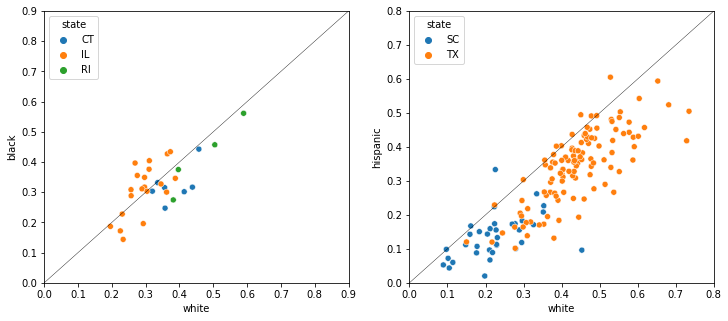

In [209]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,5))
ax1.plot(range(10),range(10), color = 'black', lw = 0.4)
ax1.set_xlim([0,0.9])  
ax1.set_ylim([0,0.9]) 
g = sns.scatterplot(data = df_blue_pivot, x = df_blue_pivot.hit_rate.white, y = df_blue_pivot.hit_rate.black, hue = 'state', ax =ax1)
# h,l = g.get_legend_handles_labels()
# ax1.legend(h[0:5],l[0:5])

ax2.plot(range(10),range(10), color = 'black', lw = 0.4)
ax2.set_xlim([0,0.8]) 
ax2.set_ylim([0,0.8]) 
sns.scatterplot(data = df_red_pivot, x = df_red_pivot.hit_rate.white, y = df_red_pivot.hit_rate.hispanic, hue = 'state', ax =ax2)
plt.show(g)

In [318]:
df_pivot = pd.concat([df_blue_pivot,df_red_pivot])
df_pivot.head()

search_rate                     stop_rate            \
subject_race                  black  hispanic     white     black  hispanic   
state subgeography                                                            
CT    Fairfield County     0.029384  0.020520  0.013487  0.073116  0.039236   
      Hartford County      0.036567  0.036986  0.012005  0.073116  0.039236   
      Litchfield County    0.034749  0.038982  0.016265  0.073116  0.039236   
      New Haven County     0.028742  0.030105  0.011492  0.073116  0.039236   
      New London County    0.031647  0.029246  0.014475  0.073116  0.039236   

                                   hit_rate                      \
subject_race                white     black  hispanic     white   
state subgeography                                                
CT    Fairfield County   0.065458  0.315113  0.257426  0.356108   
      Hartford County    0.065458  0.303398  0.294776  0.319820   
      Litchfield County  0.065458  0.301587  0.438776  0.413978   
      New Haven County   0.065458  0.247191  0.302548  0.357401   
      New London County  0.065458  0.331683  0.325926  0.335580   

                        inferred_threshold  ... stops_per_year stop_rate_n  \
subject_race                         black  ...          white       black   
state subgeography                          ...                              
CT    Fairfield County            0.171864  ...       17189.76    25650.72   
      Hartford County             0.155822  ...       17752.80    25650.72   
      Litchfield County           0.184323  ...       16466.88    25650.72   
      New Haven County            0.166497  ...       23139.36    25650.72   
      New London County           0.172387  ...       24605.76    25650.72   

                                             nb_searches                   \
subject_race             hispanic      white       black hispanic   white   
state subgeography                                                          
CT    Fairfield County   21654.72  160113.12      149.28    96.96  231.84   
      Hartford County    21654.72  160113.12      197.76   134.00  213.12   
      Litchfield County  21654.72  160113.12       31.50    49.00  267.84   
      New Haven County   21654.72  160113.12      170.88   150.72  265.92   
      New London County  21654.72  160113.12       96.96    64.80  356.16   

                        party                 
subject_race            black hispanic white  
state subgeography                            
CT    Fairfield County   blue     blue  blue  
      Hartford County    blue     blue  blue  
      Litchfield County  blue     blue  blue  
      New Haven County   blue     blue  blue  
      New London County  blue     blue  blue  

[5 rows x 24 columns]

In [270]:
def get_weights(df, states, races):
    df['weights'] = np.zeros(df.shape[0])
    for state in states:
        for race in races:
            df.loc[state,race].weights = df.loc[state,race].nb_searches/df.loc[state,race].nb_searches.sum()
    return df

<ipython-input-270-01a7be6a8422>:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[state,race].weights = df.loc[state,race].nb_searches/df.loc[state,race].nb_searches.sum()
C:\Users\louni\anaconda3\envs\ada\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [295]:
def add_normalized_rates(df):
    df_white = df[df.subject_race == 'white'].reset_index(drop = True)
    df_black = df[df.subject_race == 'black'].reset_index(drop = True)
    df_hispanic = df[df.subject_race == 'hispanic'].reset_index(drop = True)
    df_black['hit_rate_normalized'] = (df_black.hit_rate / df_white.hit_rate)*df_black.weights
    df_hispanic['hit_rate_normalized'] = (df_hispanic.hit_rate / df_white.hit_rate)*df_hispanic.weights
    df_black['threshold_normalized'] = (df_black.inferred_threshold / df_white.inferred_threshold)*df_black.weights
    df_hispanic['threshold_normalized'] = (df_hispanic.inferred_threshold / df_white.inferred_threshold)*df_hispanic.weights
    return pd.concat([df_hispanic,df_black])


In [296]:
def weighted_mean(x):
#     print(x)
    return np.mean(x)

In [308]:
# plot bar graphs by political orientation (blue/red) and by method (hit rate/threshold)
def plot_bar(method, data, params):
    ylim, ax = params
    sns.barplot(x = "state", y = method, hue = "subject_race", data = data, estimator = np.sum, ax = ax)
    ax.set_ylim(ylim)
    ax.set_xlim([-0.5,4.5])
    ax.axhline(y=1, ls = (1, (10,5)), color = 'black', lw = 0.7)
    x = np.arange(-0.5, 2.5, 0.01)
    ax.fill_between(x, ylim[0],ylim[1], color = "#5DADE2", alpha =0.5)    
    x = np.arange(2.5, 5, 0.01)
    ax.fill_between(x, ylim[0],ylim[1], color = "#E74C3C", alpha =0.5)
#     ax.set_xlim(lim)
#     ax.set_ylim(lim)

<ipython-input-270-01a7be6a8422>:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[state,race].weights = df.loc[state,race].nb_searches/df.loc[state,race].nb_searches.sum()
C:\Users\louni\anaconda3\envs\ada\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


search_rate  stop_rate   hit_rate  inferred_threshold  \
state subject_race                                                          
CT    black            0.233426   0.511815   2.258365            1.213269   
      hispanic         0.226384   0.274649   2.234800            1.213030   
IL    black            1.490942   0.706260   6.170307            1.975633   
      hispanic         1.269471   0.267292   3.951372            1.958553   
RI    black            0.196592   0.497477   1.667802            0.762599   
      hispanic         0.190921   0.176222   1.504785            0.674526   
SC    black            1.069884   6.960880   8.520055            4.305992   
      hispanic         2.490851   3.975704   4.782255            2.491381   
TX    black            4.033183   7.597037  48.338445           32.010428   
      hispanic         3.245555   7.879896  38.866940           22.960296   

                    stops_per_year   stop_rate_n  nb_searches  weights  \
state subject_race                                                       
CT    black           23474.140000  1.795550e+05   756.160000      1.0   
      hispanic        20069.360000  1.515830e+05   611.760000      1.0   
IL    black           63162.833333  1.275787e+06  4672.166667      1.0   
      hispanic        28545.333333  5.779033e+05  1667.333333      1.0   
RI    black            6813.600000  2.878400e+04   359.000000      1.0   
      hispanic         6413.000000  2.712240e+04   328.400000      1.0   
SC    black          236819.820896  9.196847e+06  7504.477612      1.0   
      hispanic        29648.955224  1.063095e+06  2025.134328      1.0   
TX    black          189223.075731  2.430309e+07  6003.534413      1.0   
      hispanic       422580.857143  8.410929e+07  9659.559745      1.0   

                    hit_rate_normalized  threshold_normalized  
state subject_race                                             
CT    black                    0.850591              0.703225  
      hispanic                 0.832651              0.699075  
IL    black                    0.914592              0.444593  
      hispanic                 0.605809              0.506697  
RI    black                    0.894222              0.678096  
      hispanic                 0.815841              0.611405  
SC    black                    1.129246              0.871667  
      hispanic                 0.613244              0.504626  
TX    black                    0.993146              0.995099  
      hispanic                 0.806290              0.735152

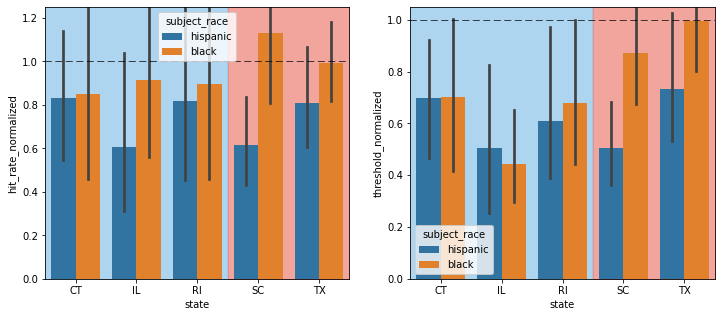

In [323]:
# blue.groupby('state').sum()
# data.groupby(['state','subject_race']).sum()
# blue.set_index(['state','subject_race']).loc['CT','white']
# blue
full = pd.concat([blue,red])
# full_normalized = add_normalized_rates(full)
races = full.subject_race.unique()
states = full.state.unique()

temp =  get_weights(full.set_index(['state','subject_race']), states, races) 
data = add_normalized_rates(temp.reset_index())
# data = add_normalized_rates(full)
parties = [blue_normalized,red_normalized]
methods = ["hit_rate_normalized", "threshold_normalized"]
ylim = [[0,1.25], [0,1.05]]
fig, axs = plt.subplots(1,2,figsize=(12,5))
for method in range(2):
    params = [ylim[method],axs[method]]
    plot_bar(methods[method],data, params)

data.groupby(['state','subject_race']).sum()

<ipython-input-270-01a7be6a8422>:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[state,race].weights = df.loc[state,race].nb_searches/df.loc[state,race].nb_searches.sum()
C:\Users\louni\anaconda3\envs\ada\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


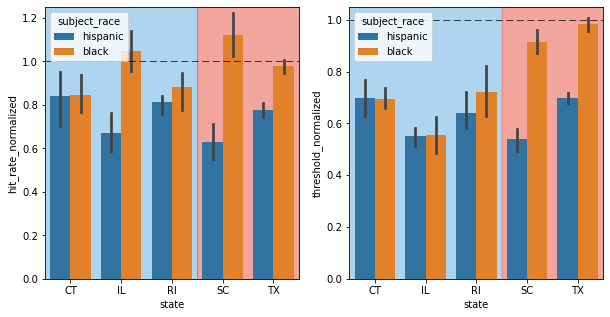

In [292]:
full = pd.concat([blue,red])
# full_normalized = add_normalized_rates(full)
races = full.subject_race.unique()
states = full.state.unique()

temp =  get_weights(full.set_index(['state','subject_race']), states, races) 
# data = add_normalized_rates(temp.reset_index())
data = add_normalized_rates(full)
parties = [blue_normalized,red_normalized]
methods = ["hit_rate_normalized", "threshold_normalized"]
ylim = [[0,1.25], [0,1.05]]
fig, axs = plt.subplots(1,2,figsize=(10,5))
for method in range(2):
    params = [ylim[method],axs[method]]
    plot_bar(methods[method],data, params)
#     fig.text(0.5, 0.04, common_x[method], ha='center')
#     fig.text(0.04, 0.5 , common_y[method], va='center', rotation='vertical')
#     for party in range(2):
#         params = axs[method]
#         data = [parties[party], methods[method]]
#         plot_bar(data, params)

# fig, (ax_hit,ax_thresh) = plt.subplots(2,2, figsize = (12,6))
# sns.barplot(x = "state", y = "inferred_threshold", hue = "subject_race", data = red, ax = ax_hit[0])
# sns.barplot(x = "state", y = "hit_rate", hue = "subject_race", data = red, ax = ax[1])
# ax[0].axhline(1)
# ax[1].axhline(1)

# sns.barplot(x = "state", y = "inferred_threshold", hue = "subject_race", data = blue, ax = ax[2])
# sns.barplot(x = "state", y = "hit_rate", hue = "subject_race", data = blue, ax = ax[3])
# ax[2].axhline(1)
# ax[3].axhline(1)

# fig, ax = plt.subplots()
# ax[0].fill_between(x, 0, 1, color = "red", alpha =0.5)


In [293]:
(red_normalized.hit_rate_normalized*red_normalized.nb_searches).sum()/red_normalized.nb_searches.sum()
(blue_normalized.hit_rate_normalized*blue_normalized.nb_searches).sum()/blue_normalized.nb_searches.sum()

0.8367926276634158

NameError: name 'minority' is not defined

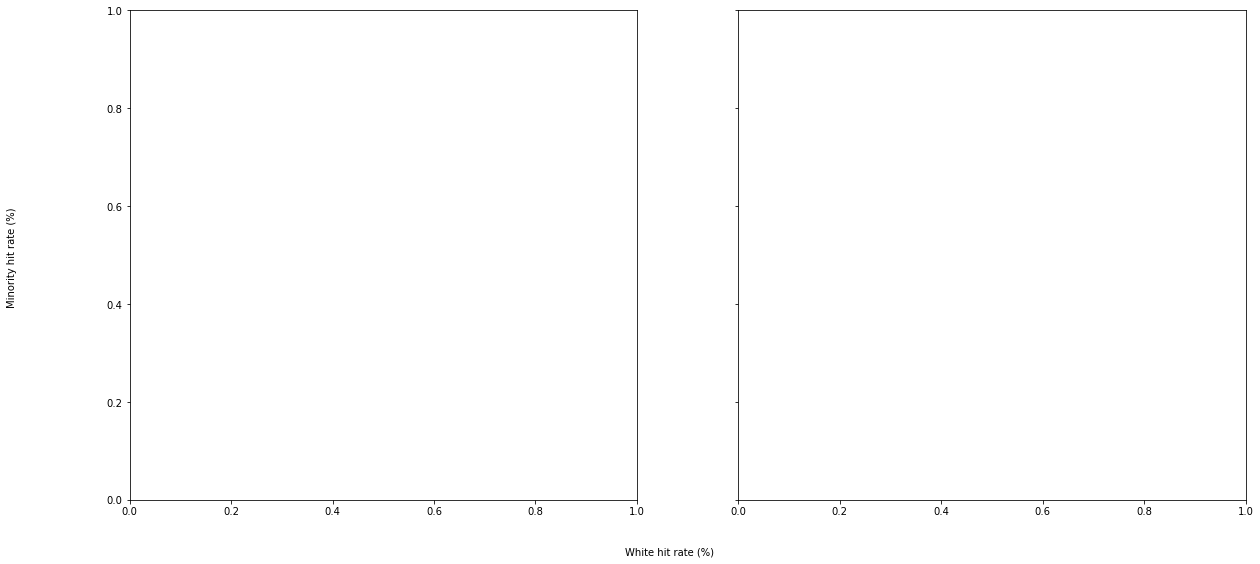

In [294]:
# plot plots
titles = ['Black drivers', 'Hispanic drivers']
common_x =['White hit rate (%)', 'White threshold (%)']
common_y =['Minority hit rate (%)', 'Minority threshold (%)']
# lim = [[0,1],[0,60]]
# ticks = [[0,20,40,60],[0,10,20,30,40,50]]
for method in range(2):
    fig, axs = plt.subplots(1,2,sharex=True, sharey=True,figsize=(20,9))
    fig.text(0.5, 0.04, common_x[method], ha='center')
    fig.text(0.04, 0.5 , common_y[method], va='center', rotation='vertical')
    for party in range(2):
        params = [axs[minority], titles[minority], ticks[method],lim[method]]
        data = [data_w[method], data_m[minority][method], search_sizes[minority] ]
        plot_bar(data, params)

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.barplot(x = "state", y = "inferred_threshold", hue = "subject_race", data = pd.concat([df_blue_hispanic,df_blue_black]), ax = ax[0])
sns.barplot(x = "state", y = "hit_rate", hue = "subject_race", data = pd.concat([df_blue_hispanic,df_blue_black]), ax = ax[1])
ax[0].axhline(1)
ax[1].axhline(1)

In [ ]:
def normalize(rates):
    
    return rates/np.max(rates.search_rate)

In [ ]:
blue_means = df_blue.groupby(["state", "subject_race"]).mean()
# blue.drop(columns = ["search_rate", "stop_rate", "inferred_threshold", "stop_rate_n", "stops_per_year"], inplace = True)
# blue_means['normalized_threshold'] = blue_means.inferred_threshold.apply()
blue_means.unstack().hit_rate.apply(lambda x: x/np.max(x), axis=1)

In [ ]:
red_means = df_red.groupby(["state", "subject_race"]).mean()
# red_means.T.SC['relative_black'] = red_means.T.SC.black.hit_rate/red_means.T.SC.white.hit_rate

red_means.unstack().T.reset_index()
# red.drop(columns = ["search_rate", "stop_rate", "inferred_threshold", "stop_rate_n", "stops_per_year"], inplace = True)

In [ ]:
labels_blue = ['CT', 'RI', 'IL']
# df_black = blue_means[blue_means.subject_race == 'black']
# df_hispanic = blue_means[blue_means.subject_race == 'hispanic']
# df_white = blue_means[blue_means.subject_race == 'white']
blue_normalized_hit_rates = blue_means.unstack().hit_rate.apply(lambda x: x/np.max(x), axis=1)
red_means.unstack().hit_rate.apply(lambda x: x/np.max(x), axis=1)

# blue_normalized_inferred_threshold = blue_means.unstack().inferred_threshold.apply(lambda x: x/np.max(x), axis=1)
# red_normalized_inferred_threshold = red_means.unstack().inferred_threshold.apply(lambda x: x/np.max(x), axis=1)

# sns.barplot(x = "state", y = "hit rates", data = red_normalized_hit_rates)
# differences = [normalized_df.black, normalized_df.hispanic, normalized_df.white]
# # differences = [df_black.inferred_threshold, df_hispanic.inferred_threshold, df_white.inferred_threshold] 

# x = np.arange(len(labels_blue))  # the label locations
# width = 0.2  # the width of the bars

# fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,6))
# rects1 = ax1.bar(x - width, differences[0], width, label='black_means')
# rects2 = ax1.bar(x , differences[1], width, label='hispanic_means')
# rects3 = ax1.bar(x + width, differences[2], width, label='white_means')


# differences = [normalized_df.black, normalized_df.hispanic, normalized_df.white]

# ax1.set_ylabel('Rates')
# ax1.set_title('Blue states')
# ax1.set_xticks(x)
# ax1.set_xticklabels(labels_blue)
# ax1.legend()

# labels_red = ['SC', 'TX']
# x = np.arange(len(labels_red))  # the label locations
# width = 0.2  # the width of the bars

# rects1 = ax2.bar(x - width, differences[0], width, label='black_means')
# rects2 = ax2.bar(x , differences[1], width, label='hispanic_means')
# rects3 = ax2.bar(x + width, differences[2], width, label='white_means')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax2.set_title('Red states')
# ax2.set_xticks(x)
# ax2.set_xticklabels(labels_red)
# ax2.legend()
# # ax.legend()

# fig.tight_layout()

# plt.show()

In [ ]:
labels = ['SC', 'TX']
# df_black = red_means[red_means.subject_race == 'black']
# df_hispanic = red_means[red_means.subject_race == 'hispanic']
# df_white = red_means[red_means.subject_race == 'white']
# means = [df_black.inferred_threshold, df_hispanic.inferred_threshold, df_white.inferred_threshold] 
normalized_df = red_means.unstack().inferred_threshold.apply(lambda x: x/np.max(x), axis=1)
differences = [normalized_df.black, normalized_df.hispanic, normalized_df.white]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, differences[0], width, label='black_means')
rects2 = ax.bar(x , differences[1], width, label='hispanic_means')
rects3 = ax.bar(x + width, differences[2], width, label='white_means')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by state and race')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
hit_rate = pd.concat([red, blue])
hit_rate.reset_index(inplace = True)

In [118]:
hit_rate[hit_rate.subject_race == 'black'].drop(columns = "subject_race")

,state,hit_rate
0,SC,0.243430
3,TX,0.427774
6,CT,0.322624
9,IL,0.308515
12,RI,0.416950
